In [2]:
#!/usr/bin/env python
#coding: utf-8

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('cleaned_accident.csv')
df.head()

,Index,Accident_Severity,Time,Day_of_week,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,...,Educational_level,Vehicle_driver_relation,Driving_experience,Pedestrian_movement,Owner_of_vehicle,Cause_of_accident,Year,Month,Day,Severity_Encoded
0,200701BS64157,Serious,5:02:00 PM,Wednesday,6/5/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,...,Above high school,Employee,1-2yr,Not a Pedestrian,Owner,Moving Backward,2019,6/1/2019,5,2
1,200701BS65737,Serious,5:02:00 PM,Tuesday,7/2/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,...,Junior high school,Employee,Above 10yr,Not a Pedestrian,Owner,Overtaking,2019,7/1/2019,2,2
2,200701BS66127,Serious,5:02:00 PM,Monday,8/26/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,...,Junior high school,Employee,1-2yr,Not a Pedestrian,Owner,Changing lane to the left,2019,8/1/2019,26,2
3,200701BS66837,Slight,1:06:00 AM,Tuesday,9/3/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,...,Junior high school,Employee,2-5yr,Not a Pedestrian,Owner,Overtaking,2019,9/1/2019,3,1
4,200701BS67207,Serious,5:30:00 PM,Thursday,9/5/2019,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,...,Junior high school,Employee,2-5yr,Not a Pedestrian,Owner,Other,2019,9/1/2019,5,2


In [5]:
df.isna()

,Index,Accident_Severity,Time,Day_of_week,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,...,Educational_level,Vehicle_driver_relation,Driving_experience,Pedestrian_movement,Owner_of_vehicle,Cause_of_accident,Year,Month,Day,Severity_Encoded
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314283,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
314284,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
314285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
314286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
pd.unique(df['Accident_Severity'])

array(['Serious', 'Slight', 'Fatal'], dtype=object)

In [7]:
df.dropna(inplace = True)

In [8]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [9]:
df.Time = df.Time
df.Day_of_week = df.Day_of_week
df.Month = df.Month
df.Day = df.Day
df.Number_of_Casualties = df.Number_of_Casualties
df.Light_Conditions = df.Light_Conditions
df.Sex_of_driver = df.Sex_of_driver
df.Road_Type = df.Road_Type
df.Weather_Conditions = df.Weather_Conditions

In [10]:
# Define mappings manually
day_mapping = {'Saturday': 1, 'Sunday': 2, 'Monday': 3,'Tuesday': 4, 'Wednesday': 5, 'Thursday': 6, 'Friday': 7}
light_mapping = {'Darkness - no lighting': 0, 'Darkness - lights unlit': 1, 'Darkness - lights lit': 2, 'Darkness - lighting unknown': 3, 'Daylight': 4}
sex_mapping = {'Male': 0, 'Female': 1}
road_mapping = {'Slip road': 0, 'Single carriageway': 1, 'Roundabout': 2, 'One way street': 3, 'Dual carriageway': 4}
weather_mapping = {'Snowing no high winds': 0, 'Snowing + high winds': 1, 'Raining no high winds': 2, 'Raining + high winds': 3, 'Fog or mist': 4, 'Fine no high winds': 5, 'Fine + high winds': 6}

# Apply mappings
df['Day_of_week_encoded'] = df['Day_of_week'].map(day_mapping)
df['Light_Conditions_encoded'] = df['Light_Conditions'].map(light_mapping)
df['Sex_of_driver_encoded'] = df['Sex_of_driver'].map(sex_mapping)
df['Road_Type_encoded'] = df['Road_Type'].map(road_mapping)
df['Weather_Conditions_encoded'] = df['Weather_Conditions'].map(weather_mapping)

In [11]:
import seaborn as sns

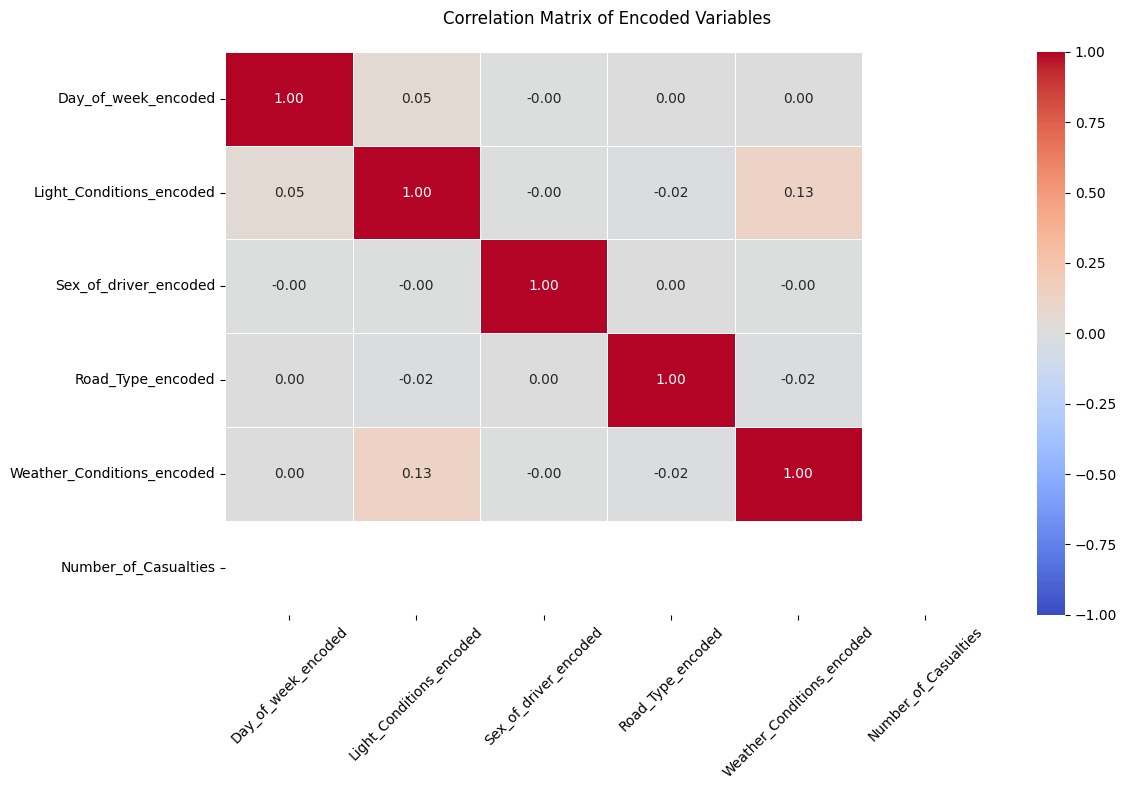

In [12]:
analysis_cols = ['Day_of_week_encoded', 'Light_Conditions_encoded', 
                 'Sex_of_driver_encoded', 'Road_Type_encoded',
                 'Weather_Conditions_encoded', 'Number_of_Casualties']

# إنشاء مصفوفة الارتباط
corr = df[analysis_cols].corr()

# رسم المصفوفة
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", 
            center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Encoded Variables", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [13]:
# df.replace(np.nan, '', regex=True)
# df.fillna('', inplace=True)
# df.columns[df.isna().any()]

In [14]:
#LabelEncoding
c = LabelEncoder()
df['Day'] = c.fit_transform(df['Day_of_week'])
df.drop('Day_of_week', axis=1, inplace=True)
l = LabelEncoder()
df['Light'] = l.fit_transform(df['Light_Conditions'])
df.drop('Light_Conditions', axis=1, inplace=True)
s = LabelEncoder()
df['Severity'] = s.fit_transform(df['Accident_Severity'])
df.drop('Accident_Severity', axis=1, inplace=True)
df.head() 

,Index,Time,Accident Date,Latitude,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,...,Month,Day,Severity_Encoded,Day_of_week_encoded,Light_Conditions_encoded,Sex_of_driver_encoded,Road_Type_encoded,Weather_Conditions_encoded,Light,Severity
0,200701BS64157,5:02:00 PM,6/5/2019,51.506187,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,...,6/1/2019,6,2,5,2,0.0,1,5.0,1,1
1,200701BS65737,5:02:00 PM,7/2/2019,51.495029,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,...,7/1/2019,5,2,4,4,0.0,1,2.0,4,1
2,200701BS66127,5:02:00 PM,8/26/2019,51.517715,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,...,8/1/2019,1,2,3,3,0.0,1,NaN,0,1
3,200701BS66837,1:06:00 AM,9/3/2019,51.488576,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,...,9/1/2019,5,1,4,2,0.0,1,NaN,1,2
4,200701BS67207,5:30:00 PM,9/5/2019,51.501405,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,...,9/1/2019,4,2,6,4,0.0,4,5.0,4,1


In [15]:
from sklearn.model_selection import train_test_split
x = df.drop([ 'Latitude', 'Longitude', 'Number_of_Casualties', 'Number_of_Vehicles', 'Day', 'Severity_Encoded', 'Day_of_week_encoded', 'Light_Conditions_encoded', 'Sex_of_driver_encoded', 'Road_Type_encoded', 'Weather_Conditions_encoded', 'Light'], axis=1)
y = df['Severity']

In [16]:
pd.unique(y)

array([1, 2, 0])

In [19]:
from sklearn.preprocessing import LabelEncoder

# ترميز كل عمود نصي
for col in x.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col].astype(str))

In [20]:
x = pd.get_dummies(x, columns=['Road_Type', 'Weather_Conditions'])

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.86)
from sklearn.tree import DecisionTreeClassifier
reg = DecisionTreeClassifier(criterion='gini')
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

1.0

In [22]:
yp = reg.predict(x_test)
import seaborn as sn
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, yp)
cm

array([[  2350,      0,      0],
       [     0,  34272,      0],
       [     0,      0, 233666]])

In [23]:
import matplotlib.pyplot as plt
from pylab import savefig

In [24]:
#labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
#labels = np.asarray(labels).reshape(2,2)
#plt.figure(figsize =(11,8))
#sn.heatmap(cm, annot=labels, cmap="Greens")

#group_names = ['True Neg','False Pos', 'False Neg','True Pos']
#group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
#group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
#labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
#labels = np.asarray(labels).reshape(2,2)
#sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [25]:
import numpy as np
import pickle
inputt=[int(x) for x in "2 10 201 10 10 8 3 7 3 1 6 8 9 6 4 3 2 99 132 233 179 189 47 23 49 67 48 38 89 43 24 47 28 56".split(' ')]
final=[np.array(inputt)]
b = reg.predict(final)
pickle.dump(reg,open('test1.pkl','wb'))
test=pickle.load(open('test1.pkl','rb'))

C:\Users\asmaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [26]:
from sklearn.ensemble import RandomForestClassifier
r_forest = RandomForestClassifier(criterion='entropy')
r_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [27]:
r_forest.score(x_test, y_test)

0.9995967264547446

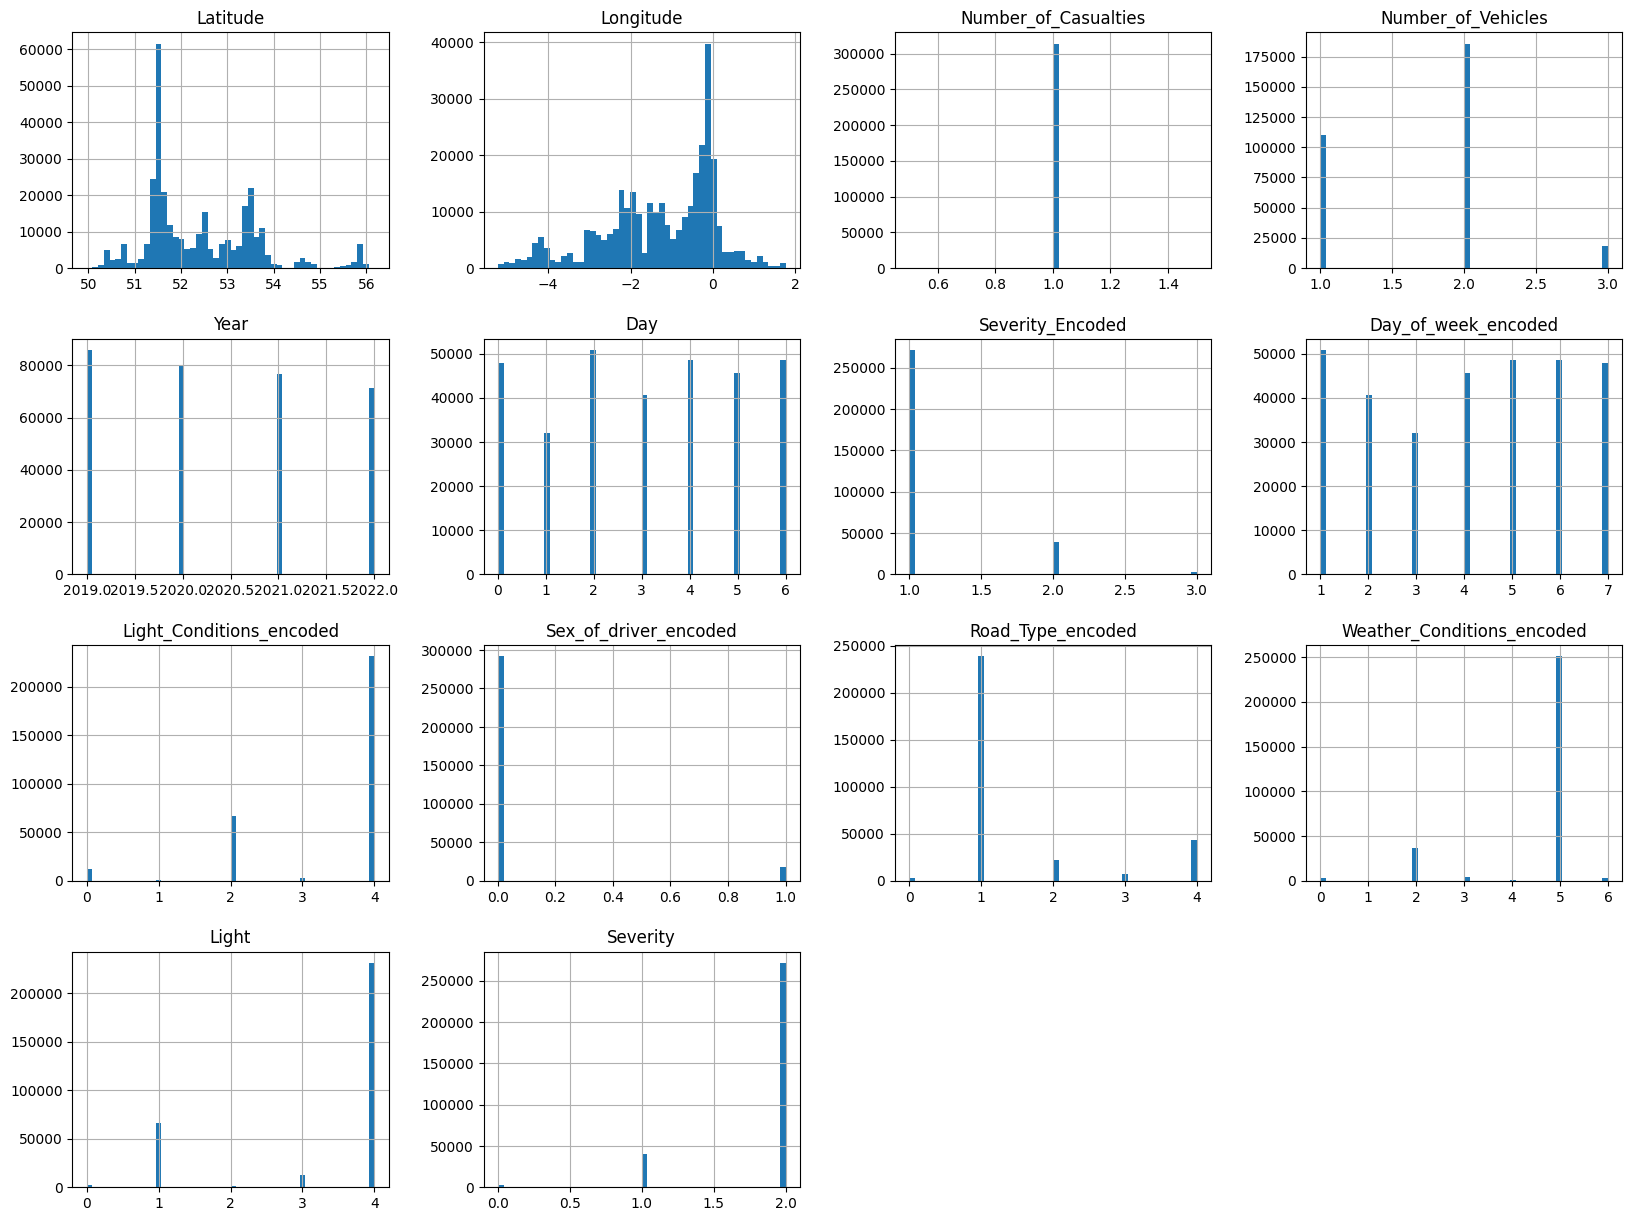

In [28]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: xlabel='Severity'>

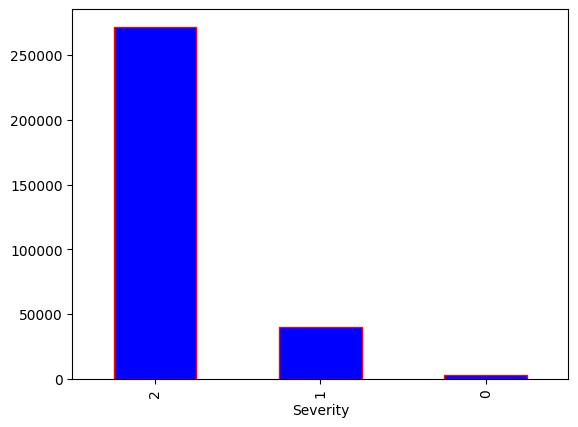

In [29]:
df["Severity"].value_counts().plot.bar(color='b', edgecolor='red',linewidth=1)

In [30]:
from sklearn import svm
model = svm.SVC(C=50, kernel = 'linear')

In [31]:
#model.fit(x_train, y_train)

In [32]:
#model.score(x_test, y_test)

In [33]:
from sklearn.linear_model import LogisticRegression
tru = LogisticRegression()
tru.fit(x_train, y_train)
tru.score(x_test, y_test)

C:\Users\asmaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8645074883087669

In [38]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model, feature_names, figsize=(10, 8)):
    n_features = len(feature_names)
    
    plt.figure(figsize=figsize)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances in Model")
    
    plt.savefig("feature_importance.png", bbox_inches='tight', dpi=300)
    plt.show()

In [56]:
import pydotplus
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image

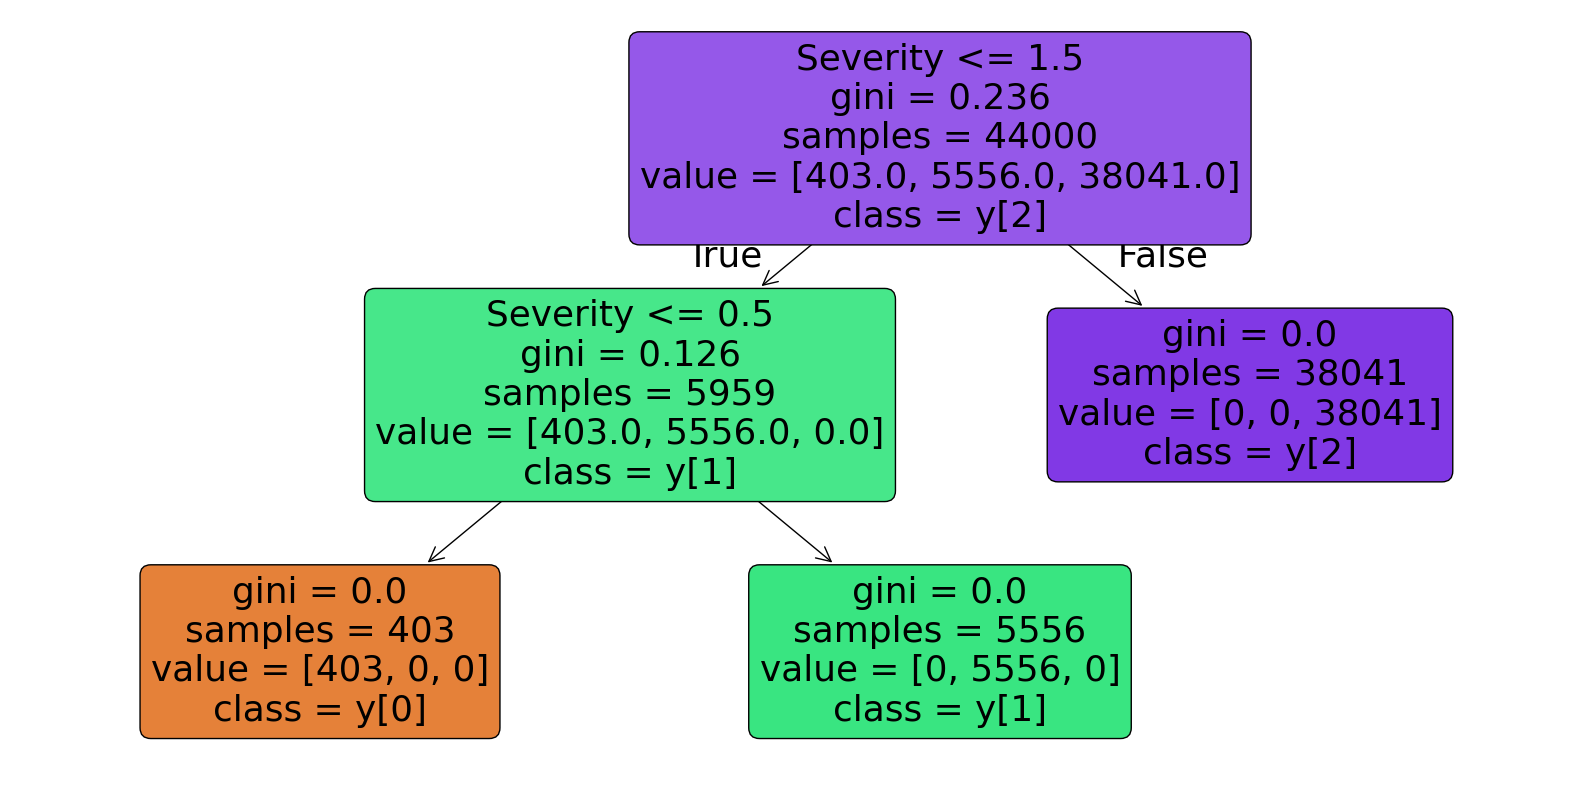

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(reg, 
          filled=True, 
          rounded=True, 
          feature_names=x.columns, 
          class_names=True)
plt.savefig('tree_plot.png', dpi=300) 
plt.show()